

## **Project 2 - Supervised learning:Regression**

### **Title**: *Cars4U price prediction*

### **Author**: *Pankaj Singh*

<br>

**Domain** 

Market analytics/Price prediction

**Project Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholds in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

**Data Description** 

The data contains the different attributes of used cars sold in different locations. 

**Attribute Information** 

- **`S.No.`** : Serial number <br>
- **`Name`** : Name of the car which includes brand name and model name <br>
- **`Location`** : Location in which the car is being sold or is available for purchase (cities) <br>
- **`Year`** : Manufacturing year of the car <br>
- **`Kilometers_driven`** : The total kilometers driven in the car by the previous owner(s) in km <br>
- **`Fuel_Type`** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG) <br>
- **`Transmission`** : The type of transmission used by the car (Automatic/Manual) <br>
- **`Owner`** : Type of ownership <br>
- **`Mileage`** : The standard mileage offered by the car company in kmpl or km/kg <br>
- **`Engine`** : The displacement volume of the engine in CC <br>
- **`Power`** : The maximum power of the engine in bhp <br>
- **`Seats`** : The number of seats in the car <br>
- **`New_Price`** : The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR) <br>
- **`Price`** : The price of the used car in INR Lakhs <br>

**Project Objective**
- To explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

**Project Deliverables**

- Develop a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing
- Perform linear regression and deliver predictions for car prices
- Actionable insights and recommendations that will help the business.

**Learning Objective**
- Exploratory Data Analysis and insights
- Data pre-processing
- Linear regression : Model building \& evaluation

## 1. **Import Libraries**

In [74]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
from IPython.display import Markdown as md

sns.set_style('whitegrid')
sns.set_context('poster')

warnings.filterwarnings('ignore')

np.random.seed(1)

## 2. **Load data \& get a first glimpse**

In [75]:
# Load data from csv file and drop the S.No. column
cars_original = pd.read_csv('used_cars_data.csv')
cars = cars_original.copy()
cars.drop(['S.No.'], axis=1, inplace=True)

### 2.1 **Data Statistics**


- #### Shape of the data

In [76]:
## Print out the shape of data
md(f"> The data consists of {cars.shape[0]} observations and {cars.shape[1]} features.")

> The data consists of 7253 observations and 13 features.

- #### A peek at the first 5 rows of the dataset

In [77]:
## Print out the random 5 rows of the data
cars.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34


- #### Check for columns types \& missing values

In [78]:
## See the overall data information
print(cars.info())
md('> The data types in the columns are of type Object, Integer \& Float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB
None


> The data types in the columns are of type Object, Integer \& Float

- #### Get statistical information of numerical columns

In [79]:
cars.describe()

,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


> A quick statistical summary of the numerical d

In [80]:
## Print out summary of missing values and sorted
print(cars.isnull().sum().sort_values(ascending=False))
md('> The target variable (`Price`) has the maximum missing values (1234), followed by `Power` (175), `Seats` (53), `Engine` (46) \& `Mileage` (2)')

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64


> The target variable (`Price`) has the maximum missing values (1234), followed by `Power` (175), `Seats` (53), `Engine` (46) \& `Mileage` (2)

## 3. Processing columns

Before we can start getting a sense of the distributions of the variables and how they relate to each other, we first need to turn many of these into numeric columns.

### 3.1 Convert `Mileage`, `Engine` \& `Power` to numerical values

Check what are the unique values in `Mileage`, `Engine` \& `Power` columns, while ignoring the NaN values

In [81]:
print('\n',
      'Unique Prefixes for Mileage = ', 
      cars['Mileage'].str.split(' ', n=1, expand=True)[1].dropna().unique(), 
      '\n',
      'Unique Prefixes for Engine = ', 
      cars['Engine'].str.split(' ', n=1, expand=True)[1].dropna().unique(), 
      '\n', 
      'Unique Prefixes for Power = ', 
      cars['Power'].str.split(' ', n=1, expand=True)[1].dropna().unique(), 
      '\n')


 Unique Prefixes for Mileage =  ['km/kg' 'kmpl'] 
 Unique Prefixes for Engine =  ['CC'] 
 Unique Prefixes for Power =  ['bhp'] 



The column of 
- `Mileage` has values which are strings, that start with numerical value and end with either kmpl or km/kg
- `Engine` has values which are strings, that start with numerical value and end with CC
- `Power` has values which are strings, that start with numerical value and end with CC

We will keep the numerical value and just discard the following string.

In [84]:
def variable_to_num(x):
    """
    This function takes in a string representing a mileage, Engine & Power.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(x, str):  # checks if `x` is a string
        return float(x.split(' ')[0])
    else:  # this happens when the current income is np.nan
        return np.nan

# units_cols = ['Mileage', 'Engine', 'Power']
# for colname in units_cols:
#     cars[colname] = cars[colname].apply(variable_to_num)
    
cars.head()  # good to go!

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


In [35]:
print(cars['Location'].unique(), '\n',
      cars['Fuel_Type'].unique(), '\n',
      cars['Transmission'].unique(), '\n',
      cars['Owner_Type'].unique(), '\n',
      cars['Location'].unique(), '\n',)

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad'] 
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric'] 
 ['Manual' 'Automatic'] 
 ['First' 'Second' 'Fourth & Above' 'Third'] 
 ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad'] 



- #### Check the data types in each columns

In [6]:
## Print out the data tyoe of each attribute
cars.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

> - Numeric attributes: `Age`, `Education`, `Usage`, `Fitness`, `Income`, `Miles`
> - Object attributes: `Product`, `Gender`, `MaritalStatus`
>
> NOTE: Even though `Fitness` appears in numerical attributes, but due to its discrete nature in finite range it can be considered categorical

- **Check if there is any null data**

In [6]:
# Checking the presence of missing values
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

> The dataset has no null values.

- **Check the unique values of the categorical variables**

In [26]:
# Print out the unique values of the categorical variables
print(cardio['Product'].unique(),',',cardio['Product'].nunique())
print(cardio['Gender'].unique(),',',cardio['Gender'].nunique())
print(cardio['MaritalStatus'].unique(),',',cardio['MaritalStatus'].nunique())
print(cardio['Fitness'].unique(),',',cardio['Fitness'].nunique())

['TM195' 'TM498' 'TM798'] , 3
['Male' 'Female'] , 2
['Single' 'Partnered'] , 2
[4 3 2 1 5] , 5


> The 4 categorical columns (including `Fitness`) have following unique values:
> - `Product` has 3 unique values
> - `Gender` has 2 unique values
> - `MaritalStatus` has 2 unique values
> - `Fitness` has 5 unique vlaues

### **Univariate Analysis**

- **Describe the numerical data**

In [8]:
# get simple statistical information of numerical data
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- **Visualize the distributions of the numerical columns**

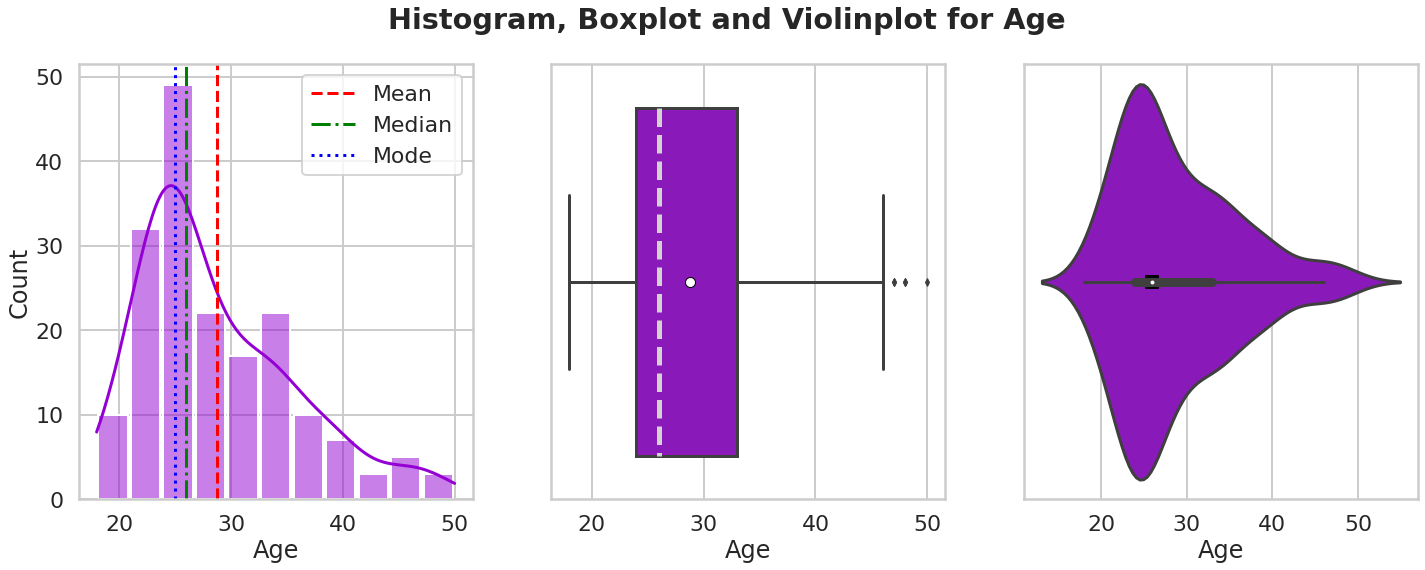

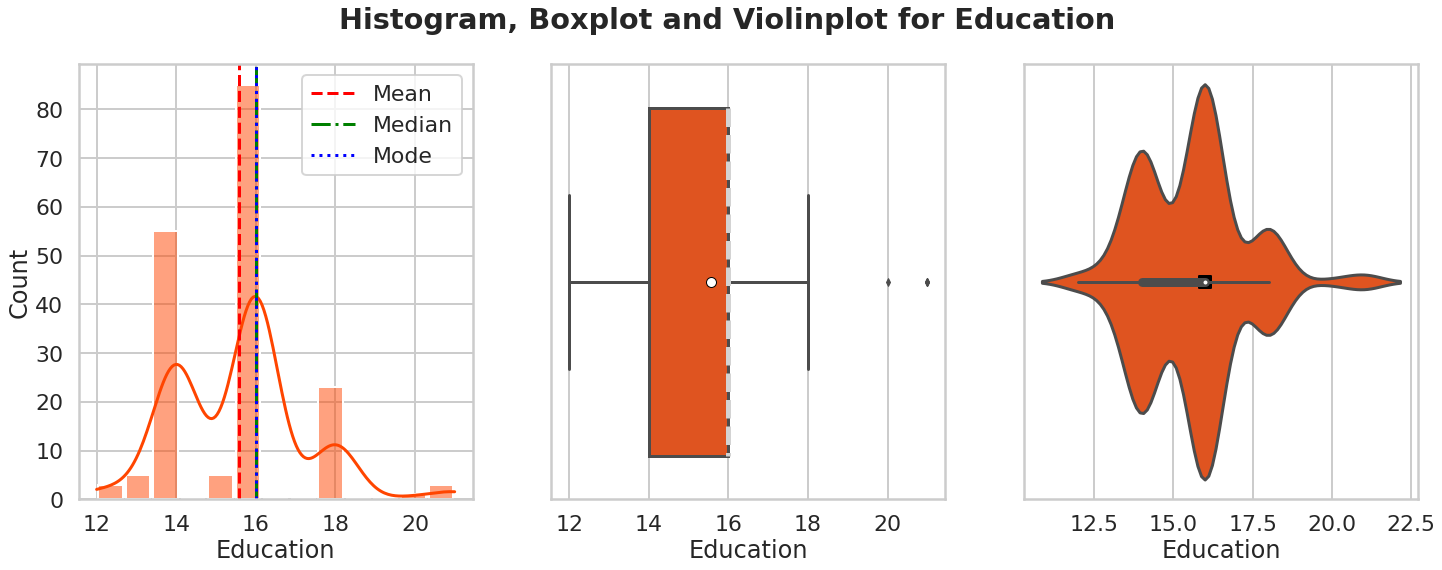

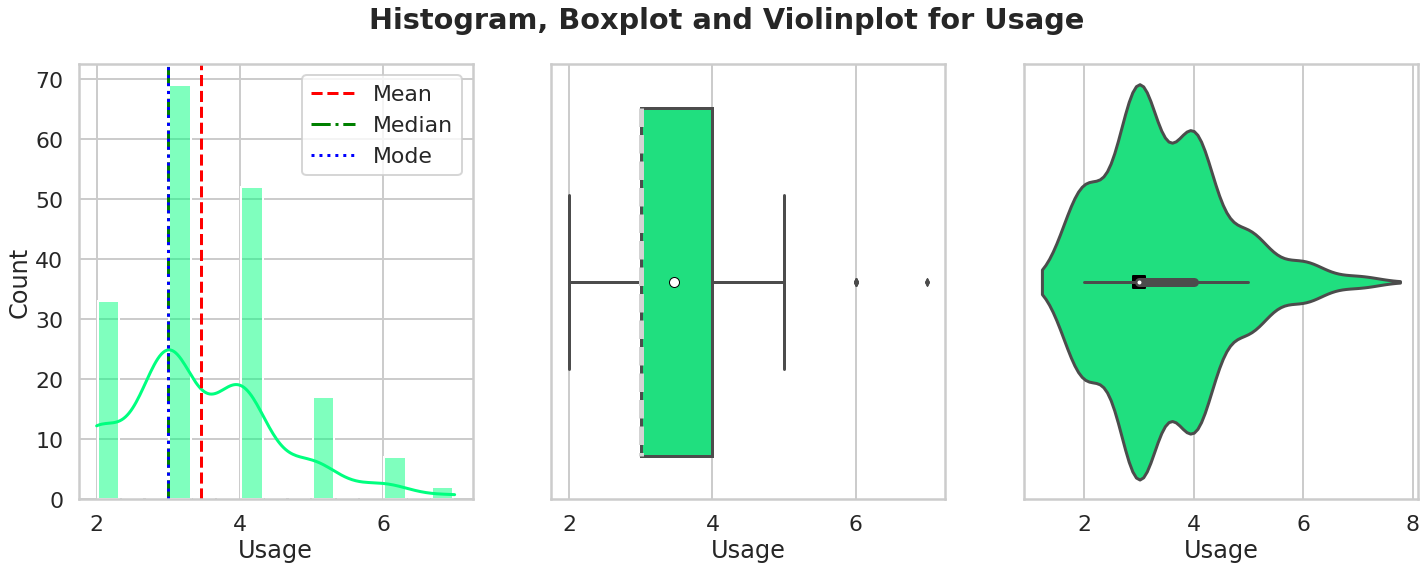

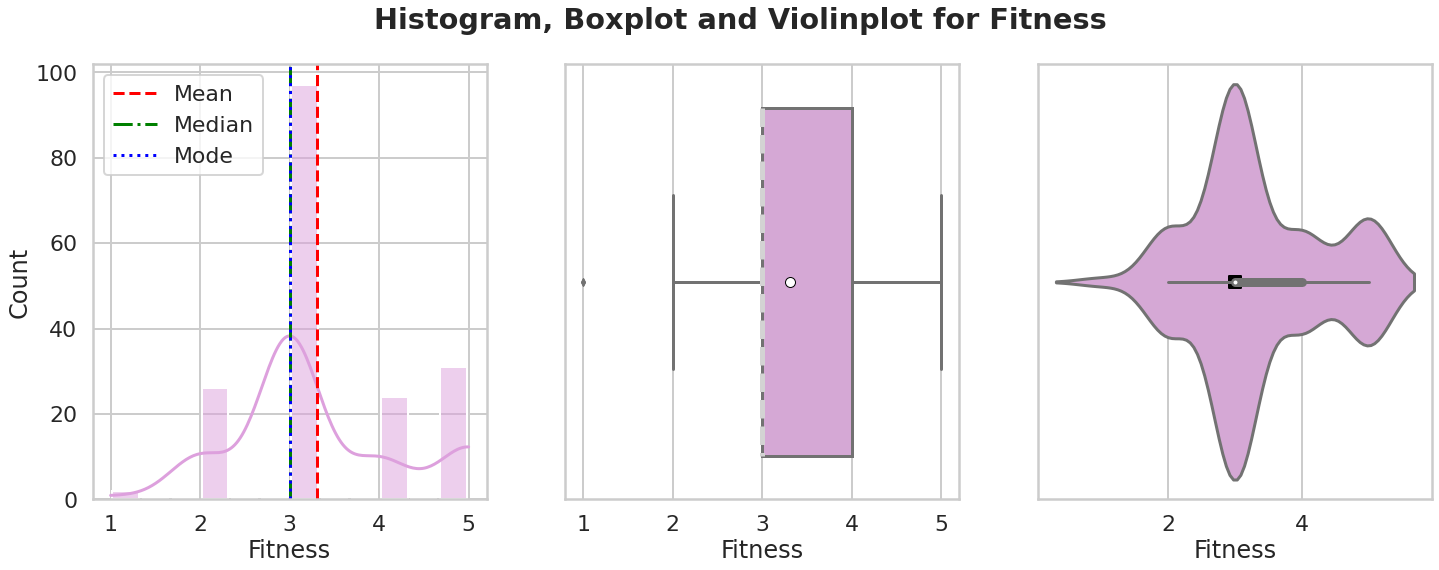

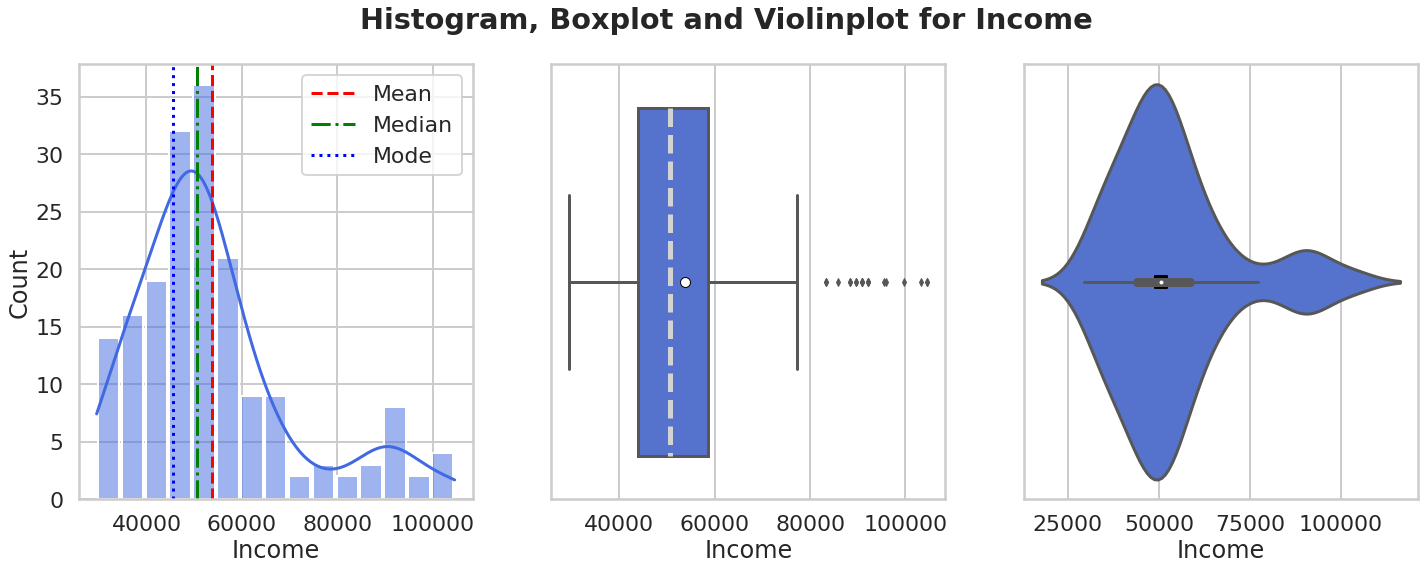

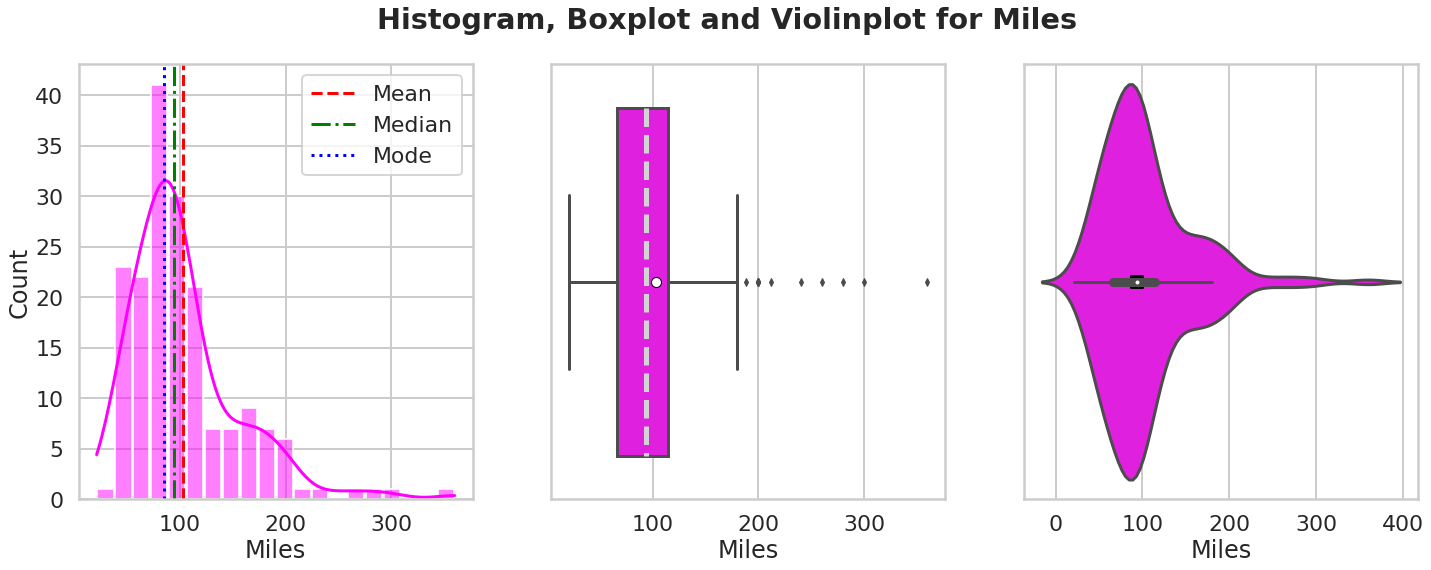

In [9]:
# a function to show 3 different kinds of univariate distribution plots
# 1. Histograms, with kernel density estimation along with mean, median and mode
# 2. Box plots along with mean
# 3. Violin plots

def plot_bar_box_violin(x,color):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    
    seriesname = x.name
    plt.suptitle(f'Histogram, Boxplot and Violinplot for {seriesname}', fontweight='heavy')
    
    # Plot # 1
    sns.histplot(x, ax=ax[0], kde=True, shrink=0.9,color=color)
    ax[0].axvline(x.mean(), color = 'r', linestyle = '--', label = 'Mean')    
    ax[0].axvline(x.median(), color = 'g', linestyle = '-.', label = 'Median')
    ax[0].axvline(x.mode()[0], color = 'b', linestyle = 'dotted', label = 'Mode')
    ax[0].legend(frameon=True)
    
    # Plot # 2
    sns.boxplot(x, ax=ax[1], showmeans=True,color=color,
                meanprops=dict(marker='o',markerfacecolor='white',markeredgecolor='k',markersize=10),
                medianprops=dict(color='lightgray',linestyle='--', linewidth=5))
    
    # Plot # 3
    sns.violinplot(x, showmeans=True, ax=ax[2],color=color)
    ax[2].scatter(x.median(), 0,c='k',marker='s')

# Univariate analysis for the AGE
plot_bar_box_violin(cardio['Age'],'darkviolet')
# Univariate analysis for the EDUCATION
plot_bar_box_violin(cardio['Education'],'orangered')
# Univariate analysis for the USAGE
plot_bar_box_violin(cardio['Usage'],'springgreen')
# Univariate analysis for the FITNESS
plot_bar_box_violin(cardio['Fitness'],'plum')
# Univariate analysis for the INCOME
plot_bar_box_violin(cardio['Income'],'royalblue')
# Univariate analysis for the MILES
plot_bar_box_violin(cardio['Miles'],'fuchsia')

> **Observations**

> - The `Age` of customers is between 18 and 50 years
>   - The median customer age is \~26 years and is less than the mean age (\~29 years). Hence distribution is right skewed
>   - There are few outliers beyond age 45


> - The customer `Education` years is between 12 and 21
>   - The median education years is \~16 years and the mean education years is \~15.5 years
>   - There are few outliers who have more than 18 years of education

> - The weekly treadmill `Usage` is between 2 to 7 times
>   - The median weekly usage is 3 times and is less than the mean weekly usage (\~3.5 times). Hence distribution is right skewed
>   - Majority usage is 3 to 4 times a week, with few outliers who are using it 6-7 times a week

> - The `Fitness` levels of customers is between 1 to 5
>   - The median fitness level is 3 and the mean fitness is \~3.3
>   - The average customer believes that they are decently fit

> - The customer `Income` is between \~30000 to \~100,000
>   - The median income is \~50,000 and is less than the mean income (\~54,000), making this distribution right skewed
>   - There are quite a few outliers making more than 80,000 a year

> - The `Miles` expected to run by customers is between 21 to 360 mi
>   - The median expected miles is 94 mi and is less than the mean expected miles (\~103.2 times), making the distirbution right skewed
>   - Average customer expects to run \~100 mi 
>   - There are quite a few outliers who plan to run more than 200 mi

- **Print out the unique values of categorical data**

In [10]:
# List the unique values under each categorical variables and their counts

# unique values and number of values under it for PRODUCT
print(cardio['Product'].value_counts(),'\n\n')
# unique values and number of values under it for GENDER
print(cardio['Gender'].value_counts(),'\n\n')
# unique values and number of values under it for MARITALSTATUS
print(cardio['MaritalStatus'].value_counts(),'\n\n')
# unique values and number of values under it for FITNESS
print(cardio['Fitness'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64 


Male      104
Female     76
Name: Gender, dtype: int64 


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 


3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


- **Count and proportions in categorical data**

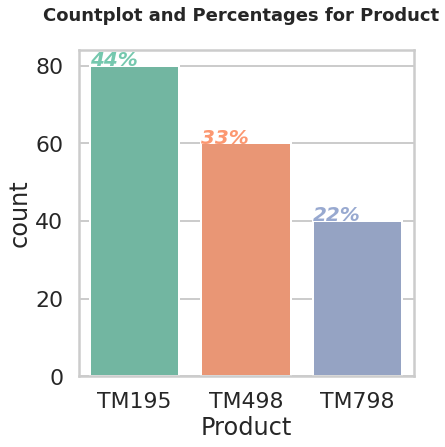

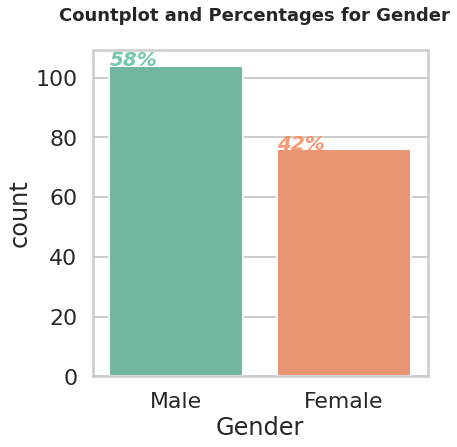

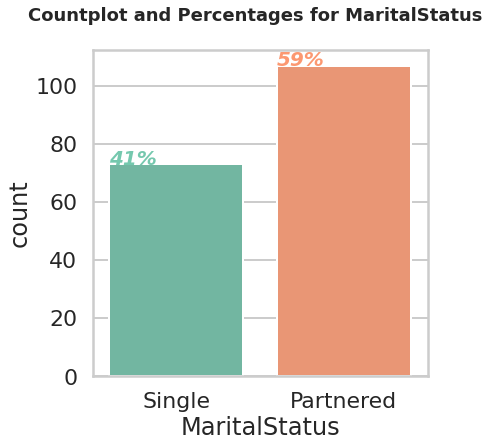

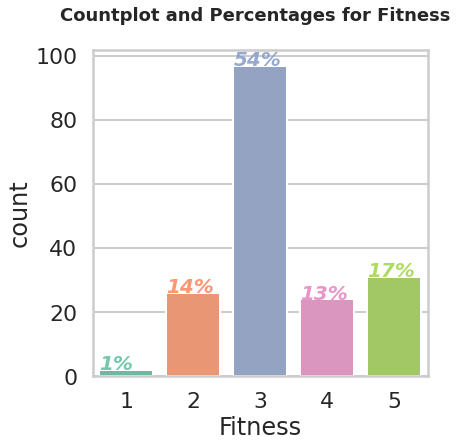

In [11]:
# A function to show the countplots for each categorical variable 
# along with the %age proportion under each unique values
def plot_count(x):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    
    seriesname = x.name
    plt.suptitle(f'Countplot and Percentages for {seriesname}', fontweight='heavy', fontsize=18)
    
    # Plot the countplot
    sns.countplot(x, ax=ax, palette='Set2')
    
    # inserting %ages above bars courtsey of StackOverflow
    # (https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)
    
    # Display the %age of the unique value of the categorical variables
    total = len(x)
    colors = sns.color_palette('Set2')[:x.nunique()]
    for i,p in enumerate(ax.patches):
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        xcoord = p.get_x() + p.get_width()*0
        ycoord = p.get_y() + p.get_height()
        ax.annotate(percentage, (xcoord, ycoord), size = 20, 
                    **dict(alpha=0.9), color = colors[i], 
                    fontweight='bold', fontstyle='italic')

# count and proportion of unique PRODUCTS
plot_count(cardio['Product'])
# count and proportion of unique GENDER
plot_count(cardio['Gender'])
# count and proportion of unique MARITALSTATUS
plot_count(cardio['MaritalStatus'])
# count and proportion of unique FITNESS
plot_count(cardio['Fitness'])

> **Observations**

> - There are 3 different `Products` being sold
>   - Those are *TM195*, *TM498* and *TM798* in the order of portion of total treadmill sales

> - From `Gender` perspective, majority customer have been *male*

> - The majority `MaritalStatus` of the customer is *partenered*

> - The majority customers rate themselves at `Fitness` level of *3 out of 5*

### **Multivariate Analysis**

As part of this section I will be focussing on product centered multivariate analysis, since that is the deliverable. So further analysis I will be obtaining customer characterstics for each product.

- **Bivariate analysis of Product with other categorical variables**

In [12]:
# using pandas crosstab and apply function to find proportion & count of customers for each PRODUCT 
# under unique categorical values

# Show the count and proportion of customers within each GENDER for all the PRODUCTS
print('Gender specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')

# Show the count and proportion of customers within each FITNESS level for all the PRODUCTS
print('Fitness level specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']).apply(lambda r: 100*r/r.sum(), axis=1).round(1),'\n\n')

# Show the mean FITNESS level of customers for all the PRODUCTS
print('Average Fitness level of customers for each product\n')
print(cardio.groupby('Product')['Fitness'].agg(['mean']),'\n\n')

# Show the count and proportion of customers within each MARITALSTATUS for all the PRODUCTS
print('Marital Status specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')

Gender specific count and percentages of customers for each product

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33 

Gender   Female   Male
Product               
TM195     50.00  50.00
TM498     48.33  51.67
TM798     17.50  82.50 


Fitness level specific count and percentages of customers for each product

Fitness  1   2   3  4   5
Product                  
TM195    1  14  54  9   2
TM498    1  12  39  8   0
TM798    0   0   4  7  29 

Fitness    1     2     3     4     5
Product                             
TM195    1.2  17.5  67.5  11.2   2.5
TM498    1.7  20.0  65.0  13.3   0.0
TM798    0.0   0.0  10.0  17.5  72.5 


Average Fitness level of customers for each product

           mean
Product        
TM195    2.9625
TM498    2.9000
TM798    4.6250 


Marital Status specific count and percentages of customers for each product

MaritalStatus  Partnered  Single
Product                         
TM195                 48  

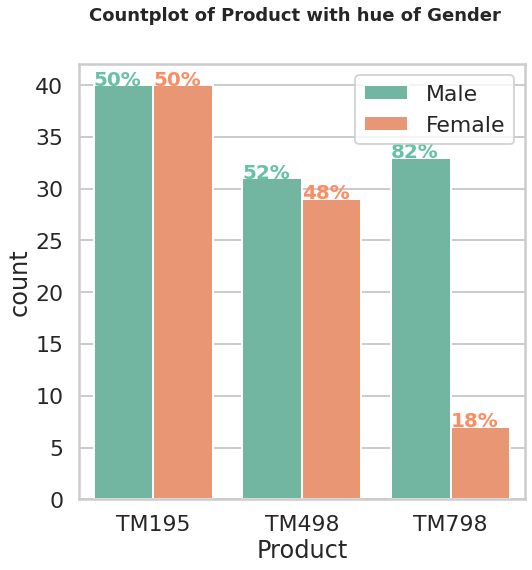

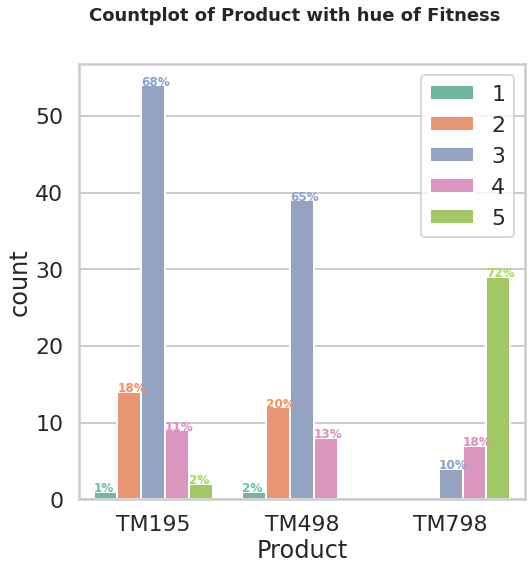

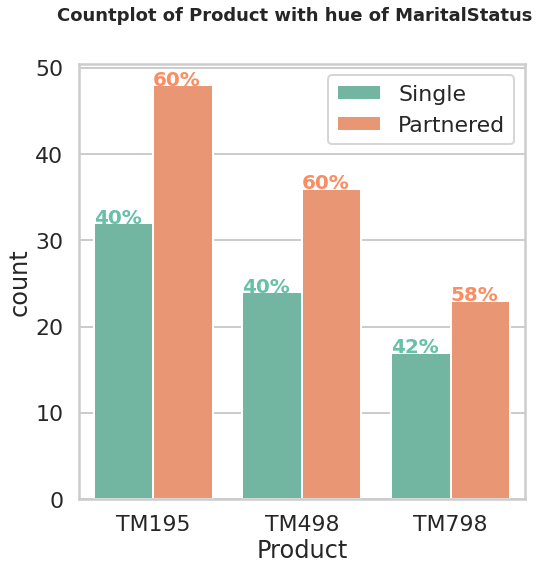

In [13]:
# Visually show proportion & count of customers for each PRODUCT under unique categorical values
def plot_countplots_model(data, var, hue, fs):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    sns.countplot(data=data, x=var, hue=hue, ax=ax, palette='Set2')
    plt.suptitle(f'Countplot of {var} with hue of {hue}', fontweight='heavy', fontsize=18)
    ax.legend(loc='best')
    
    
    Number_of_categories = data[var].nunique()
    hue_categories = data[hue].nunique()    
    colors = sns.color_palette('Set2')[:hue_categories]
    
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = data[var].value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() 
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = fs, **dict(alpha=1),color = colors[j], fontweight='bold')
# Visually show proportion & count of customers for each PRODUCT under unique GENDER values    
plot_countplots_model(cardio, 'Product', 'Gender',20)
# Visually show proportion & count of customers for each PRODUCT under unique FITNESS values
plot_countplots_model(cardio, 'Product', 'Fitness',12)
# Visually show proportion & count of customers for each PRODUCT under unique MARITALSTATUS values
plot_countplots_model(cardio, 'Product', 'MaritalStatus',20)

> **Observations**

> Some interesting observations can be drawn from the simple bivariate analysis of `Product` with `Gender`, `Fitness` and `MaritalStatus`
> - `Product` TM195 and TM498 have almost equally gender diverse customer base. But men are the dominant customer of the `Product` TM798 
>    - This is indicating that in customers interested in buying TM798 are predominatly male

> - Again a similar pattern arises for Product #s TM195 and TM498 in terms of `Fitness` level of the customers, where they rate themselves *\~3* on an average. Whereas, the TM798 customers rate themselves much higher 
(*\~4.6*)
>    - The high `Fitness` level indicates that the TM798 is a product for more advanced user.

> - The `MaritalStatus` of the customer seems to stay in similar proportions across all products

- **Bivariate analysis of Product with numerical variables and categorical values in hue**

In [14]:
# This function display bivariate analysis numbers and shows following plots for bivariate analysis of 
# numerical variable with categorical variables
#
# 1. 3 sets of barplots which show the means with a categorical variables (GENDER, MARITALSTATUS & FITNESS) 
#    as hue overlayed over the overall mean for the PRODUCT. Also, the strip plot is plotted over these barplots.
#
# 2. 2 sets of split violin plots with categorical variables (GENDER & MARITALSTATUS) as hue, with an overlay of 
#    strip plot
# 
# 3. 1 plot of 2D kde contour of the numerical variable against FITNESS and overlaid on top is the scatter plot
#    which shows the data points

def describe_product_numvar(numvar):
    
    catvars = ['Gender', 'MaritalStatus', 'Fitness']
    
    print(f'Description of Products w.r.t {numvar} and categorical variables')
    
    # Display the PRODUCT specific mean and median of the numerical variables
    print('\n\n')    
    print(cardio.groupby(['Product'])[numvar].agg(['mean','median']).round(1))
    
    # Display PRODUCT specific and categorical variable based mean, median and count
    for catvar in catvars:
        print('\n\n')
        print(cardio.groupby(['Product',catvar])[numvar].agg(['mean','median','count']).round(1))        
    
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    fig.tight_layout(pad=3.0)
    plt.suptitle(f'Mean barplot of {numvar} w.r.t Products', fontweight='heavy', fontsize=24)
    
    # Plot # 1
    for i, var in enumerate(catvars):
        
        # Barplot with hue
        sns.barplot(data=cardio, x='Product', y=numvar, hue=var, palette='Set2',
                    estimator=np.mean, ax=ax[i],**({'alpha':1}))
        # Barplot without hue
        sns.barplot(data=cardio, x='Product', y=numvar, ax=ax[i], ci=None,
                    **({'fill':False,'edgecolor':'k','linestyle':'--','label':'Product mean'}))
        # Add the data points as stripplot
        sns.stripplot(data=cardio, x ='Product', y=numvar, hue=var, 
                      jitter=True, ax=ax[i], dodge=True, edgecolor='black',
                      alpha=0.3, linewidth=1,
                      size=8, palette='Set2')
        # modify legend to list the quantities of interest
        handles, labels = ax[i].get_legend_handles_labels()
        ax[i].legend(handles[cardio[var].nunique():], labels[cardio[var].nunique():], 
                     fontsize=15, loc='best',framealpha=0.2)
        ax[i].title.set_text(var)
        
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    fig.tight_layout(pad=3.0)
    
    # Plot # 2
    for i, var in enumerate(catvars[:2]):
        
        # Plot the split violinplot
        sns.violinplot(data=cardio, x="Product", y=numvar, 
                       hue=var, split=True, inner="quart", 
                       linewidth=2,ax=ax[i],palette='Set2')
        # PLot the data as stripplot
        sns.stripplot(data=cardio, x ='Product', y=numvar, hue=var, 
                      jitter=True, ax=ax[i], dodge=True, edgecolor='black',
                      alpha=0.3, linewidth=1,
                      size=8, palette='Set2')
        # modify the legend to list the quantities of interest
        handles, labels = ax[i].get_legend_handles_labels()
        ax[i].legend(handles[0:cardio[var].nunique()], labels[0:cardio[var].nunique()], 
                     fontsize=15, loc='upper left',framealpha=0.2)
        ax[i].title.set_text(var)
        
        
    # Plot # 3    
    # Plot the 2D kde contour
    ax = sns.displot(data=cardio, x="Fitness", y=numvar, hue='Product',palette='Set2',
                     kind='kde', height=8, levels=2, fill = False)
    # Plot the data points as scatter plot
    sns.scatterplot(data=cardio, x="Fitness", y=numvar, hue='Product',
                    legend=False, alpha = 0.4, edgecolor='k', palette='Set2',
                    linewidth = 0.5, style='Product')
    # modify the legend to list the quantities of interest
    sns.move_legend(ax, loc = 'lower left', bbox_to_anchor=(.2, .7),
                    fontsize=20, frameon=True)
    ax.set_yticklabels(rotation=45, fontsize=20)

Description of Products w.r.t Income and categorical variables



            mean   median
Product                  
TM195    46418.0  46617.0
TM498    48973.6  49459.5
TM798    75441.6  76568.5



                   mean   median  count
Product Gender                         
TM195   Female  46020.1  46048.5     40
        Male    46816.0  46617.0     40
TM498   Female  49336.4  48891.0     29
        Male    48634.3  50028.0     31
TM798   Female  73633.9  69721.0      7
        Male    75825.0  77191.0     33



                          mean   median  count
Product MaritalStatus                         
TM195   Partnered      47848.8  46617.0     48
        Single         44271.9  43774.5     32
TM498   Partnered      49522.7  51165.0     36
        Single         48150.1  47185.5     24
TM798   Partnered      82047.2  85906.0     23
        Single         66504.6  58516.0     17



                    mean   median  count
Product Fitness                         
TM195   1        

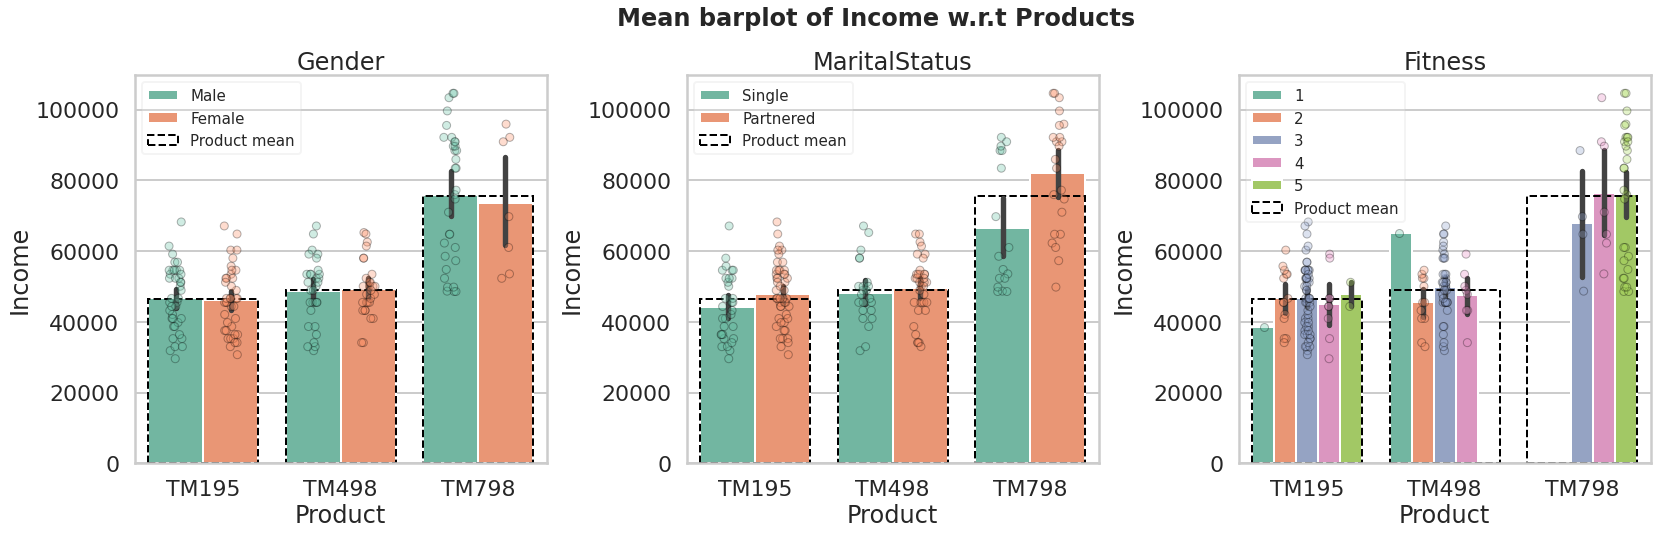

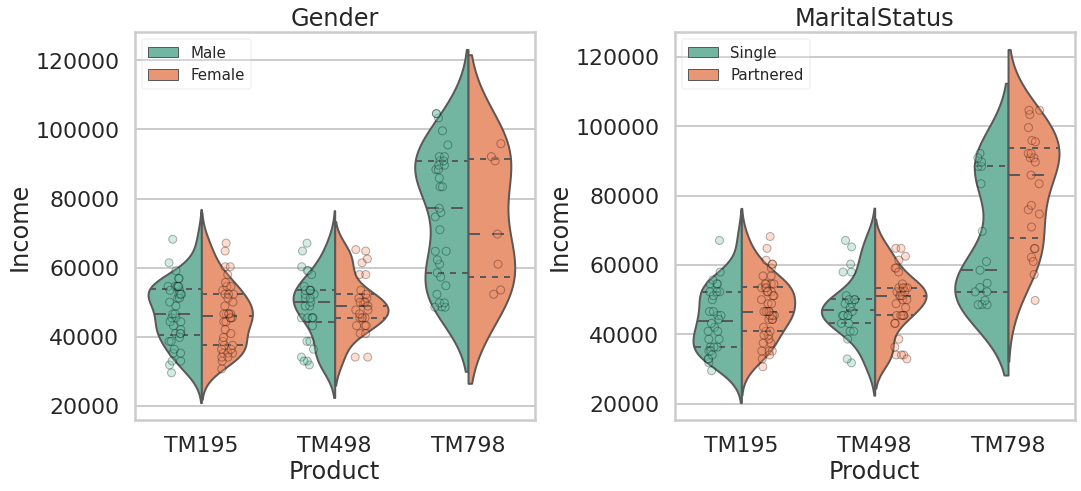

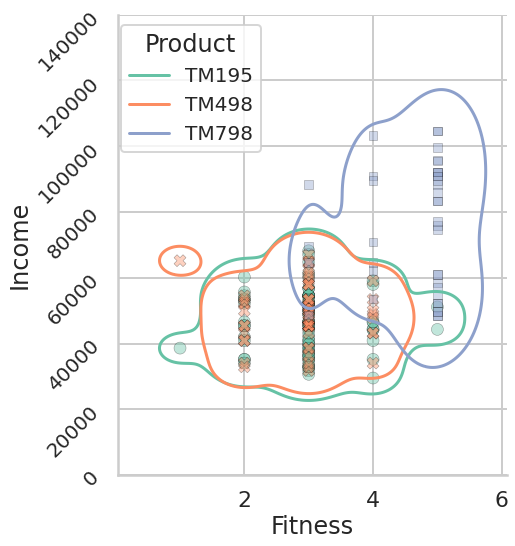

In [15]:
# Display the details and plots of the bivariate analysis of INCOME with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Income')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Income`
> - `Product`s TM195 and TM498 are bought by customers in a similar `Income` group (30k - 70k). But customer of the `Product` TM798 belong in a much higher income group (50k - 100k)
> - `Gender`wise there is a smaller representation of women in the customer group of `Product` TM798
> - `MaritalStatus`wise partnered customers are dominant in the customer across all `Product`s and have higher `Income`s compared to single customers as well. 
> - `Fitness` level of customers in `Income` group (30k - 70k) is predominatly \~3 and prefer `Product` TM195 and TM498. 
> - For `Product` TM798 the average `Fitness` level is high as well as they belong in a higher `Income` group (50k - 100k)
> - Majority of TM798 customers have higher `Fitness` level as well as higher `Income`

Description of Products w.r.t Age and categorical variables



         mean  median
Product              
TM195    28.6    26.0
TM498    28.9    26.0
TM798    29.1    27.0



                mean  median  count
Product Gender                     
TM195   Female  28.4    26.5     40
        Male    28.6    26.0     40
TM498   Female  29.1    29.0     29
        Male    28.7    25.0     31
TM798   Female  27.0    26.0      7
        Male    29.5    27.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      29.7    27.5     48
        Single         26.9    25.0     32
TM498   Partnered      30.2    31.0     36
        Single         26.9    25.0     24
TM798   Partnered      29.8    28.0     23
        Single         28.1    24.0     17



                 mean  median  count
Product Fitness                     
TM195   1        23.0    23.0      1
        2        28.3    26.5     14
        3        28.6    26.5     54
 

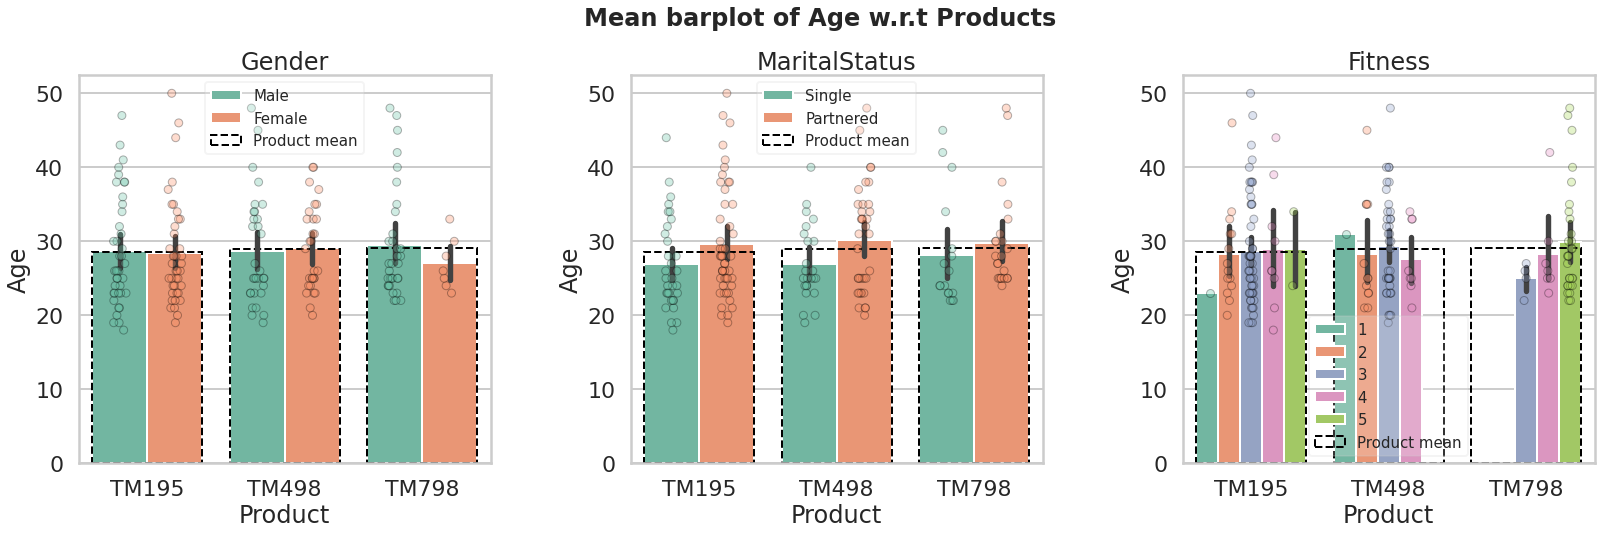

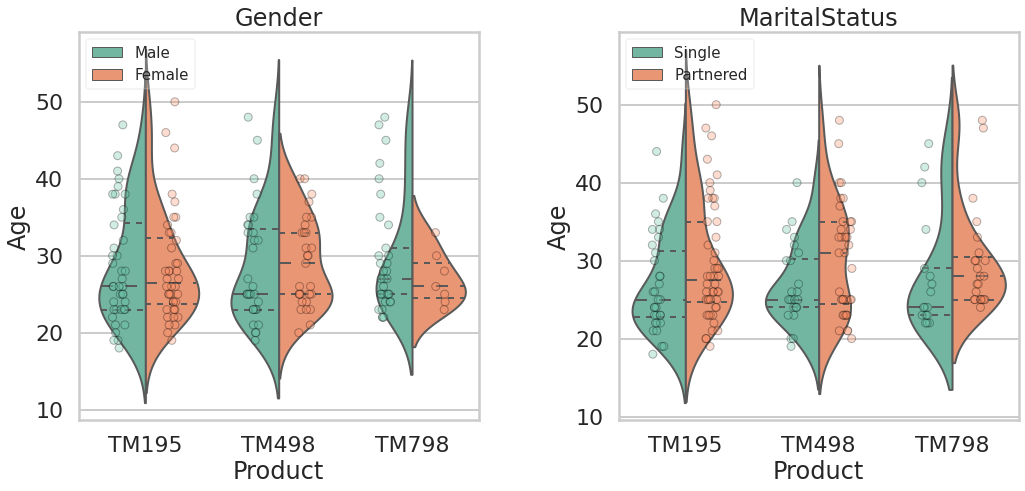

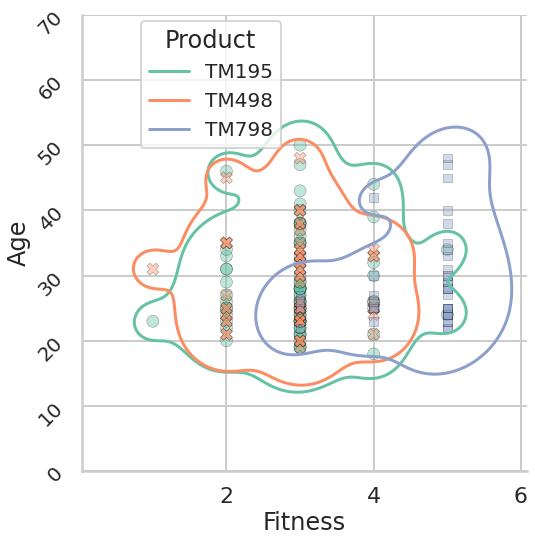

In [16]:
# Display the details and plots of the bivariate analysis of AGE with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Age')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Age`
> - The average `Age` of cutomers of all the `Product`s is between (28 - 29).
> - For `Product` TM798, the females are much younger than males.
> - Partnered customers have higher `Age` compared to single customers across all `Products`
> - A majority number of customers of TM798 who have a really high `Fitness` level (5/5) are also relatively older.

Description of Products w.r.t Education and categorical variables



         mean  median
Product              
TM195    15.0    16.0
TM498    15.1    16.0
TM798    17.3    18.0



                mean  median  count
Product Gender                     
TM195   Female  15.1    15.5     40
        Male    15.0    16.0     40
TM498   Female  15.2    16.0     29
        Male    15.0    16.0     31
TM798   Female  17.9    18.0      7
        Male    17.2    18.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      15.1    16.0     48
        Single         14.9    15.0     32
TM498   Partnered      15.2    16.0     36
        Single         14.9    14.0     24
TM798   Partnered      17.4    18.0     23
        Single         17.2    16.0     17



                 mean  median  count
Product Fitness                     
TM195   1        16.0    16.0      1
        2        14.6    14.0     14
        3        15.1    16.0   

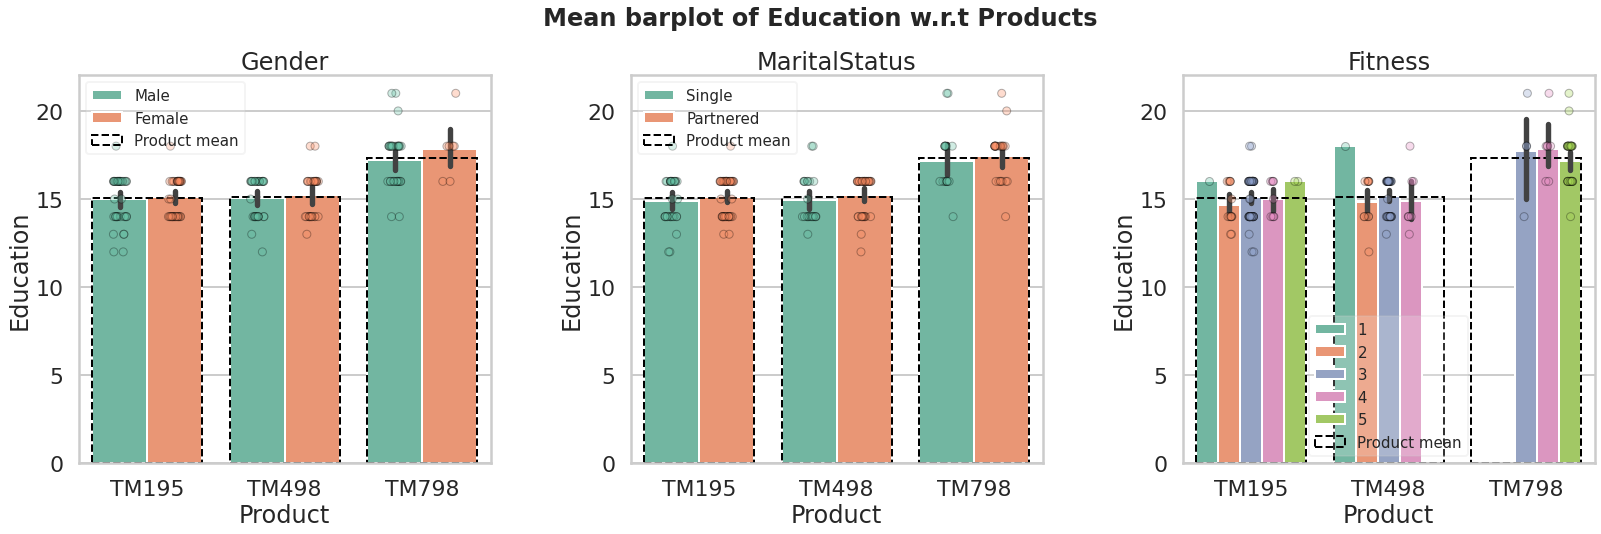

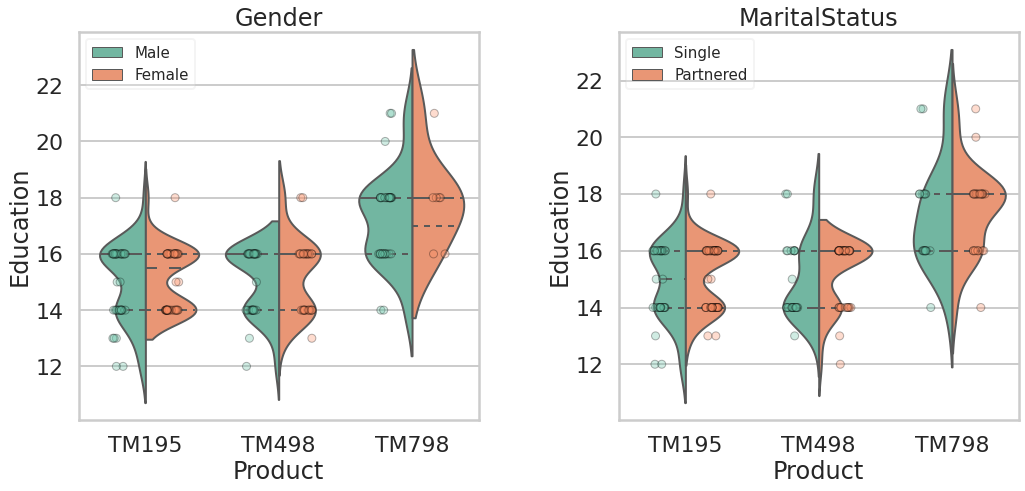

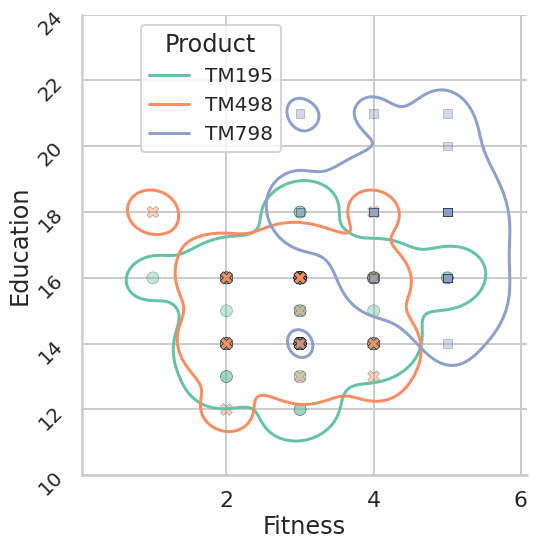

In [17]:
# Display the details and plots of the bivariate analysis of EDUCATION with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Education')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Education`
> - The average `Education` of cutomers of `Product` TM798 is higher than the customers of other product by \~2 years, indicating that they have a graduate degree.
> - Partnered customers have a slightly longer `Education` than single users.
> - There is a slight positive correlation between `Education` and `Fitness` level of the customers.

Description of Products w.r.t Usage and categorical variables



         mean  median
Product              
TM195     3.1     3.0
TM498     3.1     3.0
TM798     4.8     5.0



                mean  median  count
Product Gender                     
TM195   Female   2.9     3.0     40
        Male     3.3     3.0     40
TM498   Female   3.1     3.0     29
        Male     3.0     3.0     31
TM798   Female   5.0     5.0      7
        Male     4.7     4.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered       3.0     3.0     48
        Single          3.2     3.0     32
TM498   Partnered       3.1     3.0     36
        Single          3.1     3.0     24
TM798   Partnered       4.9     5.0     23
        Single          4.6     5.0     17



                 mean  median  count
Product Fitness                     
TM195   1         3.0     3.0      1
        2         2.4     2.0     14
        3         3.1     3.0     54

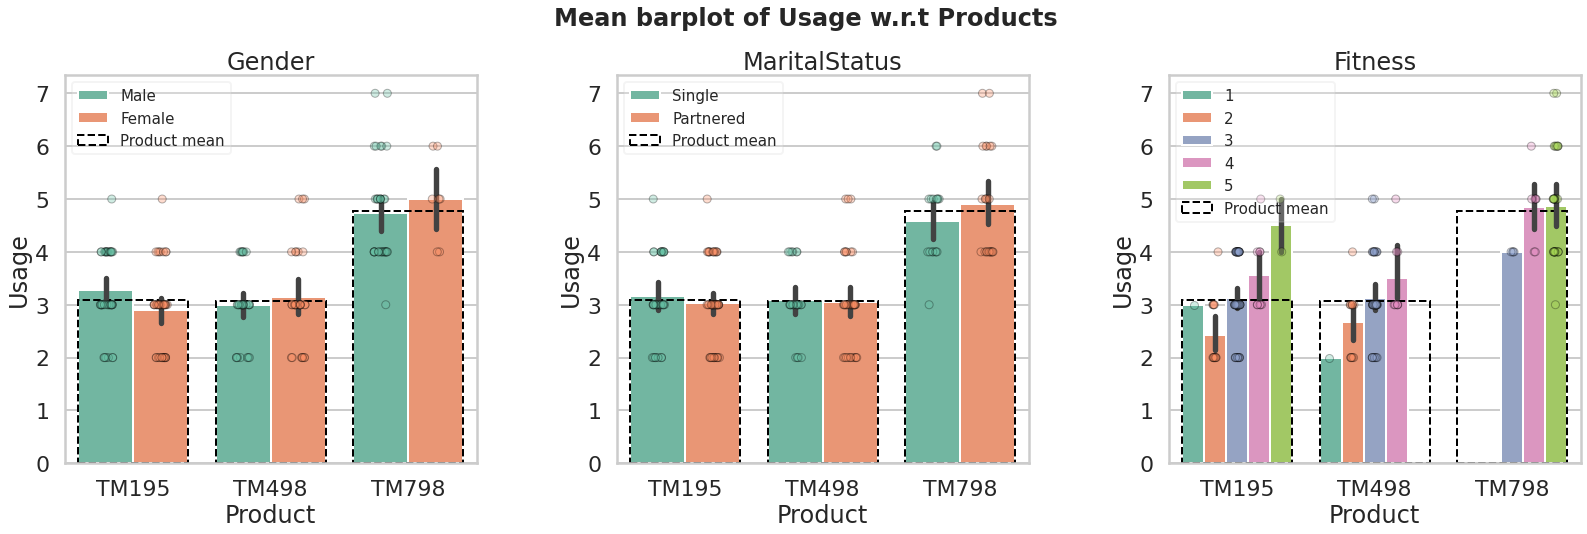

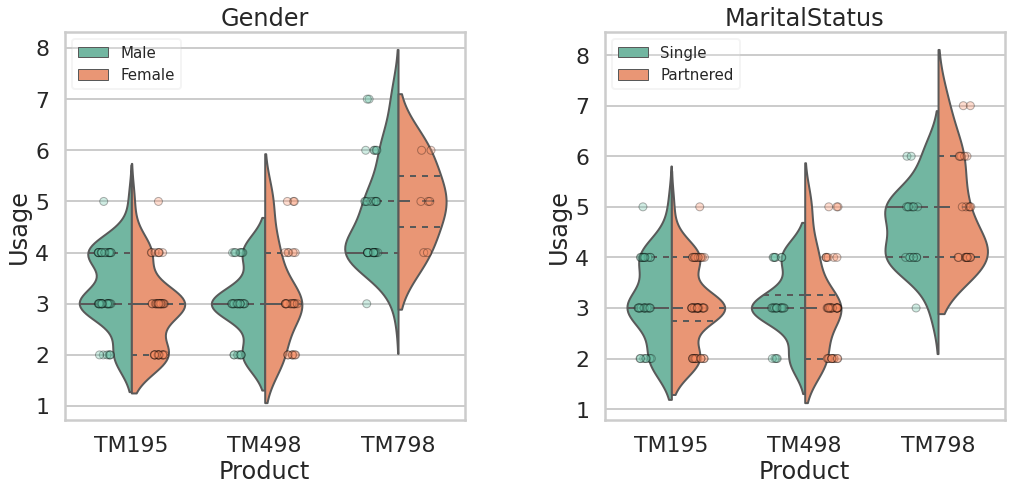

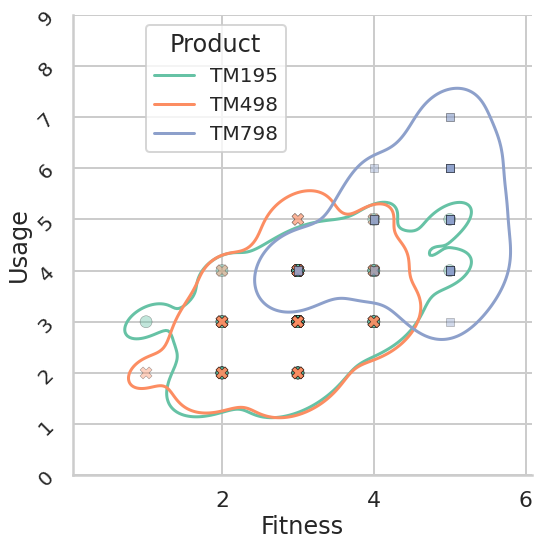

In [18]:
# Display the details and plots of the bivariate analysis of USAGE with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Usage')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Usage`
> - The average `Usage` of `Product` TM798 is higher than the `Usage` of TM195 and TM498. The higher `Usage` of TM798 along with the higher `Fitness` level of its customer indicate that they are more advanced.
> - There is a positive correlation between `Usage` and `Fitness` level of users. TM798 customers are on the higher end of that correlation whereas the customers of TM195 and TM498 are on the lower end.

Description of Products w.r.t Miles and categorical variables



          mean  median
Product               
TM195     82.8    85.0
TM498     87.9    85.0
TM798    166.9   160.0



                 mean  median  count
Product Gender                      
TM195   Female   76.2    75.0     40
        Male     89.4    85.0     40
TM498   Female   87.3    85.0     29
        Male     88.5    95.0     31
TM798   Female  180.0   200.0      7
        Male    164.1   160.0     33



                        mean  median  count
Product MaritalStatus                      
TM195   Partnered       77.2    75.0     48
        Single          91.1    85.0     32
TM498   Partnered       90.1    85.0     36
        Single          84.8    85.0     24
TM798   Partnered      183.0   180.0     23
        Single         145.1   150.0     17



                  mean  median  count
Product Fitness                      
TM195   1         47.0    47.0      1
        2         49.1    47.0     14
        3  

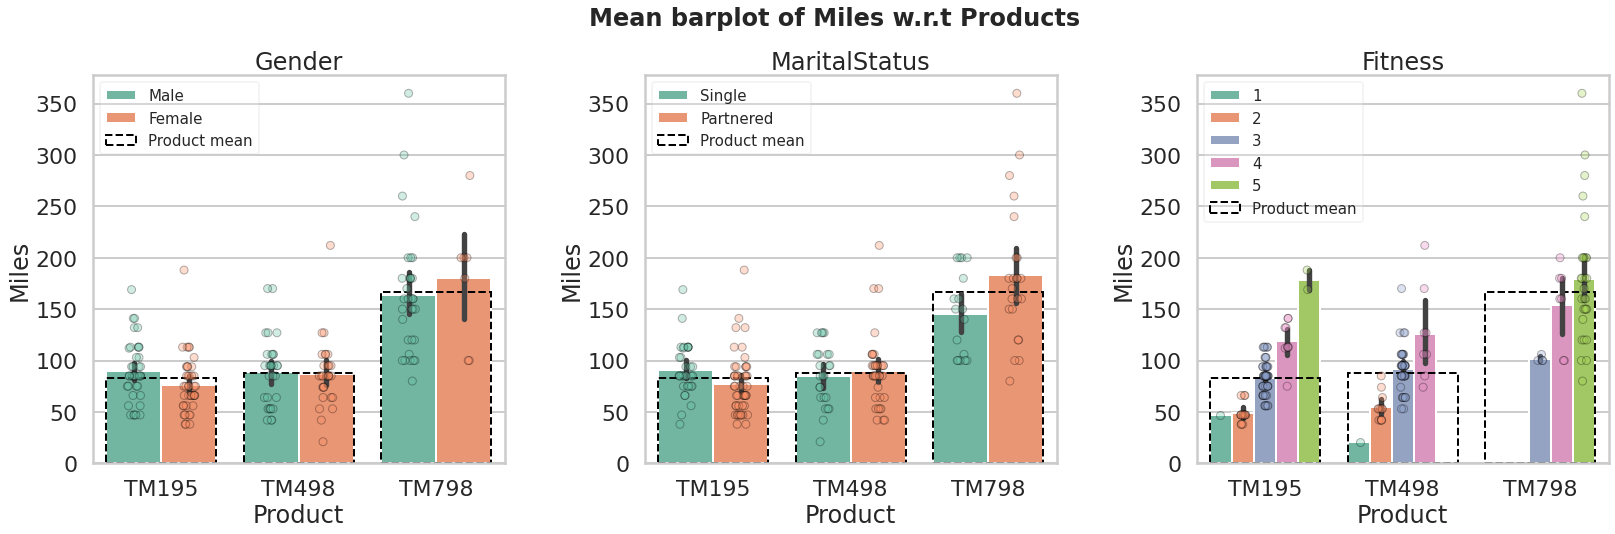

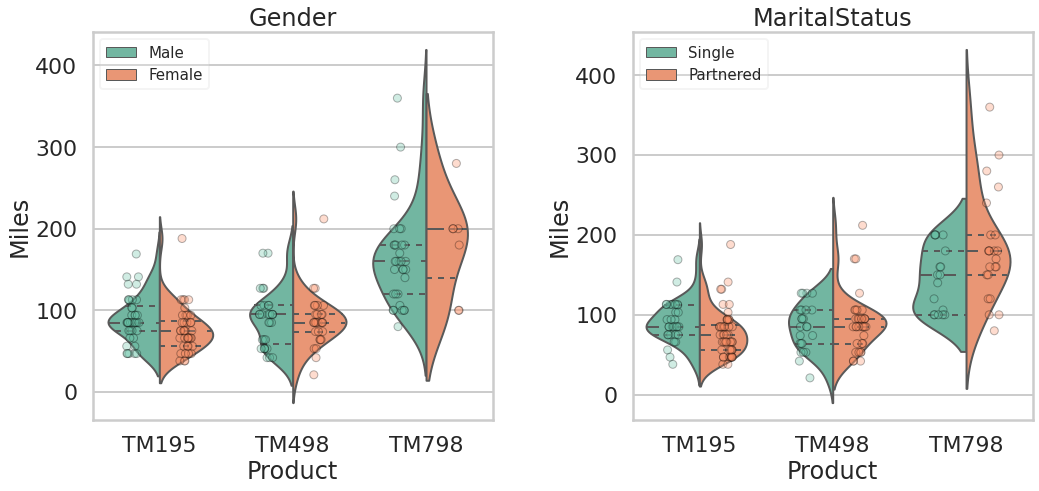

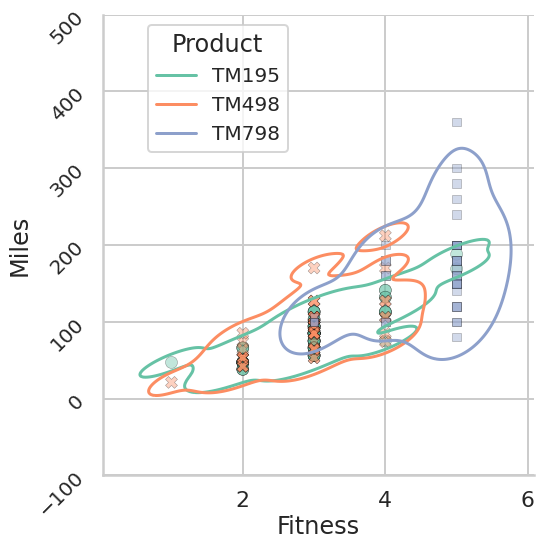

In [19]:
describe_product_numvar('Miles')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Miles`
> - The average `Miles` of `Product` TM798 is much higher than the `Miles` of TM195 and TM498. 
> - The partnered customers of TM798 put on much more miles compared to single customers
> - There is a strong positive correlation between `Miles` and `Fitness` level of customers. TM798 customers are on the higher end of that correlation whereas the customers of TM195 and TM498 are on the lower end.

- **Correlation analysis of numerical variables**

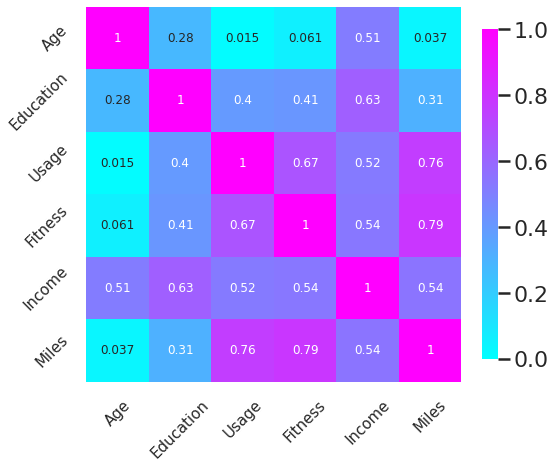

In [20]:
# Show the coorelation of numerical values on a color coded matrix
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.tight_layout(pad=2.0)

corr = cardio.corr()
sns.heatmap(corr, annot=True, ax=ax, annot_kws={'fontsize':12}, 
            cmap='cool',vmin=0,  vmax = 1, square=True, cbar_kws={'fraction':0.04})#, mask=matrix)
ax.tick_params(axis='both', rotation = 45, labelsize=15)

In [21]:
# Show the list of correlations sorted with correlation value
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
sorted_mat = upper_corr_mat.unstack().dropna().sort_values(ascending=False)
print(sorted_mat)

Miles      Fitness      0.785702
           Usage        0.759130
Fitness    Usage        0.668606
Income     Education    0.625827
Miles      Income       0.543473
Income     Fitness      0.535005
           Usage        0.519537
           Age          0.513414
Fitness    Education    0.410581
Usage      Education    0.395155
Miles      Education    0.307284
Education  Age          0.280496
Fitness    Age          0.061105
Miles      Age          0.036618
Usage      Age          0.015064
dtype: float64


> **Observations**

> Following observations can be drawn from the correlation analysis of numerical variables:
> - A very strong positive correlation between `Miles`, `Fitness` \& `Usage` (0.79, 0.76 \& 0.67), which makes sense for customers with higher `Fitness` level being able to run longer annual `Miles` which are logically linked to higher `Usage`.
> - A positive correlation is observed for `Income` with `Education` (0.63), `Miles` (0.54), `Fitness` (0.54), `Usage` (0.52) \& `Age` (0.51).
> - The next significant positive correlation is of `Education` with `Fitness` (0.41), `Usage` (0.40), `Miles` (0.31) \& `Age` (0.28).
> - There is no negative correlation between numerical quantities.

- **Plotting linear regression of top 8 correlations of numerical variables**

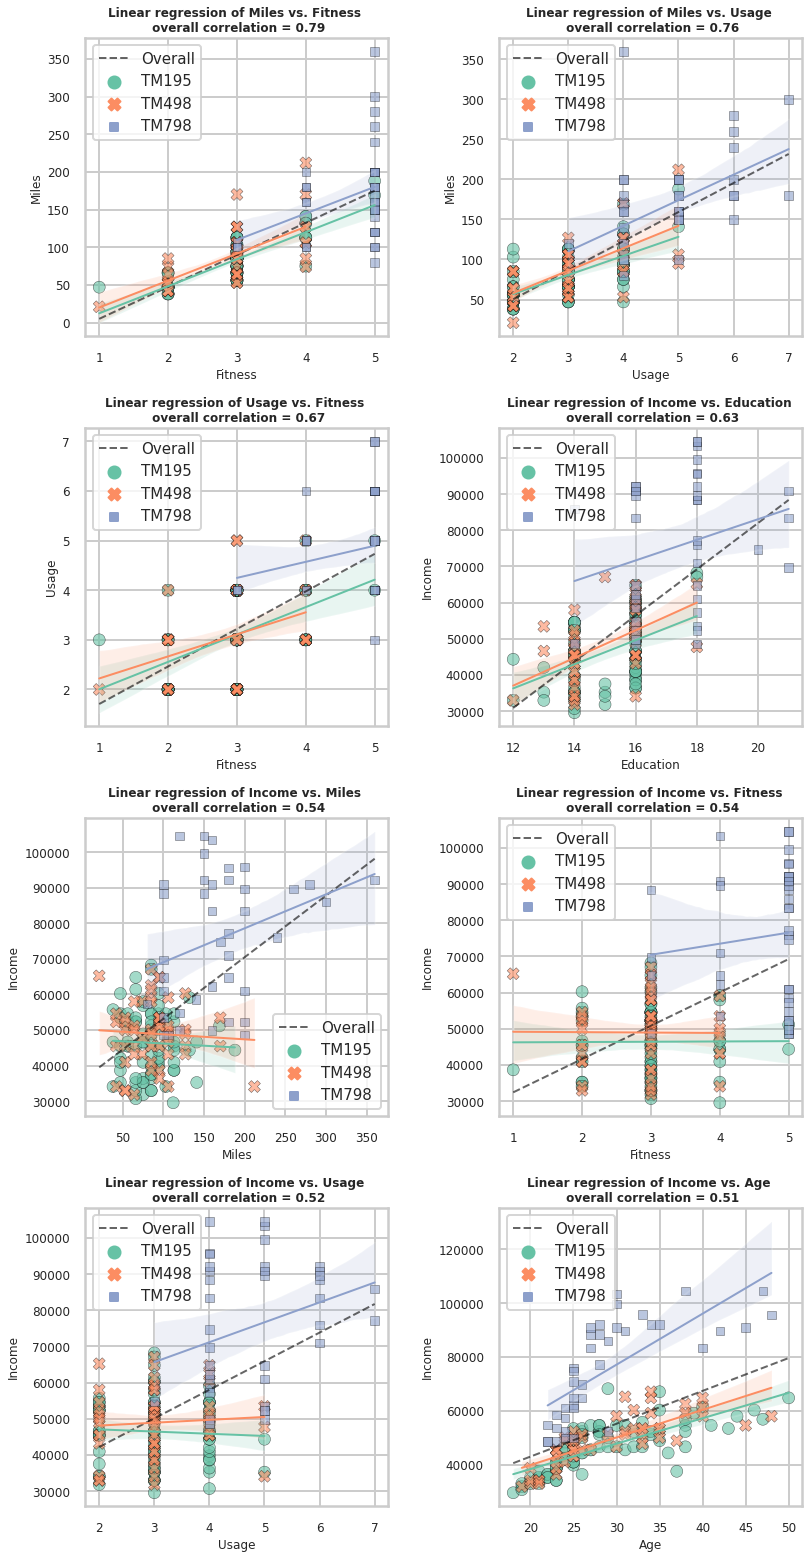

In [22]:
# This funxtion plots the linear regresssion lines along with scatter plots of overall linear fit as well 
# PRODUCT based linear fits too
def plot_linfit_mod(ax,qx,qy):
    palette='Set2'
    # show the all the data points with PRODUCT as hue
    sns.scatterplot(data=cardio, x=qx, y=qy, hue="Product", ax=ax,
                    palette=palette, alpha=0.6, style='Product',
                    edgecolor='k', linewidth = 0.5)
    # Plot the overall linear fit
    sns.regplot(data=cardio, x=qx, y=qy, scatter=False, 
                ax=ax,color='k', line_kws={'linestyle':'--','linewidth':2, 
                                           'alpha':0.6}, 
                ci=None, label='Overall');
    ax.legend(fontsize=15)
    
    # Plot the product wise linear fits
    colors = sns.color_palette(palette)[:cardio.Product.nunique()]
    for i, product in enumerate(cardio.Product.unique()):
        sns.regplot(data=cardio[cardio['Product'] == product], 
                    x=qx, y=qy, scatter=False, 
                    ax=ax, color=colors[i], line_kws={'linewidth':2});
    ax.set_title(f'Linear regression of {qy} vs. {qx} \n overall correlation = {corr[qx][qy]:.2f}', 
                 fontsize=12, fontweight='heavy')
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Show the linear regression of top 8 correlations
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,22))
fig.tight_layout(pad=1.5,h_pad=2)
axs = axs.ravel()
variableList = np.concatenate(([['Fitness','Usage','Fitness','Education','Miles','Fitness','Usage','Age']],
                               [['Miles','Miles','Usage','Income','Income','Income','Income','Income']]),
                              axis=0).T
for i,ax in enumerate(axs):
    plot_linfit_mod(ax,variableList[i,0], variableList[i,1])

> **Observations**

> Following observations can be drawn from the linear regression of `Fitness`, `Usage` \& `Miles` along with `Proudct` as hue:
> - In comparison to overall linear regression between `Fitness`, `Usage` \& `Miles` the individual regression for each `Product` follows similar linear regression as well.
> - As shown earlier, the users of TM798 are on the higher end of the `Fitness`, `Usage`\& `Miles`.


> Following observations can be drawn from the linear regression of `Income` with `Education`, `Miles`, `Fitness`, `Usage` \& `Age` along with `Proudct` as hue:
> - An overall postive correlation is observed for `Income` with `Education` \& `Age`. This positive correlation is also observed across all the `Product`s.
> - An overall postive correlation is observed for `Income` with `Miles`, `Fitness` \& `Usage`. This positive correlation is although not observed across all the `Product`s. It is only observed for TM798.

- **Multivariate Analysis with `Gender` and `MaritalStatus` as hues**

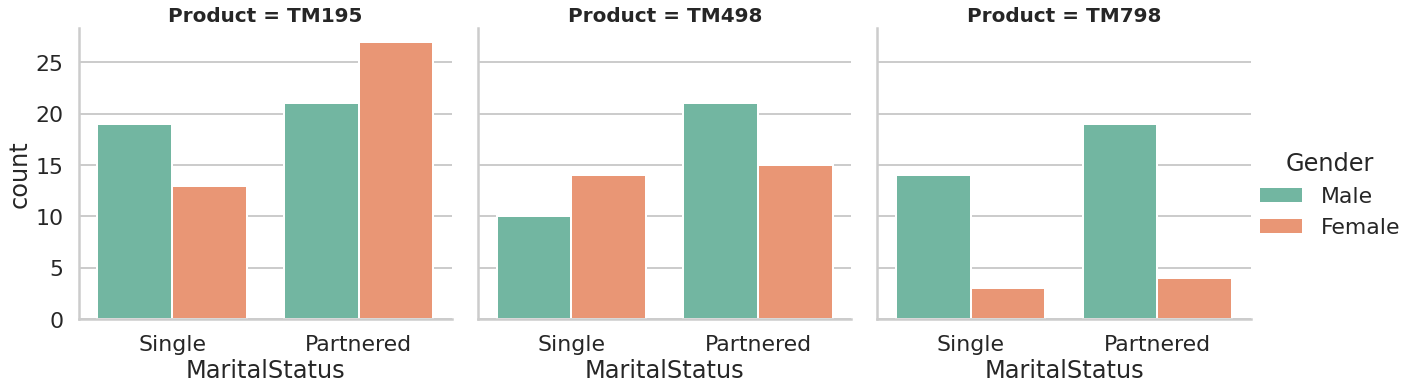

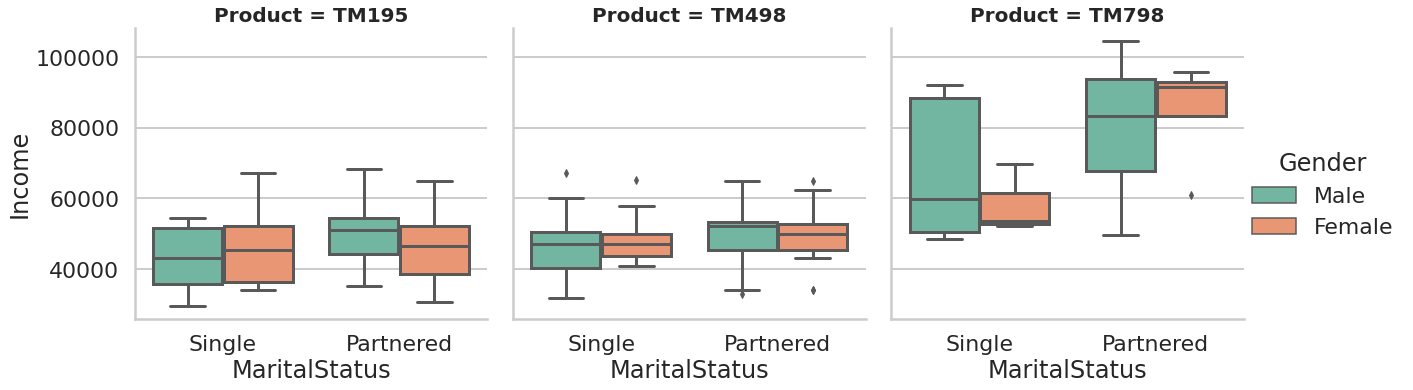

In [23]:
# Show series of countplots with varying PRODUCTs and for each PRODUCT show the GENDER and MARITALSTATUS 
# based distribution
ax = sns.catplot(data=cardio, x='MaritalStatus', kind='count', hue='Gender', 
                 col='Product', palette='Set2', height=6);
ax.set_titles(size=20, fontweight='heavy');

# Show series of boxplots with varying PRODUCTs and for each PRODUCT show the GENDER and MARITALSTATUS 
# based distribution of INCOME
ax = sns.catplot(data=cardio, x='MaritalStatus', y='Income', kind='box', hue='Gender', dodge=True,
                 col='Product', palette='Set2', height=6);
ax.set_titles(size=20, fontweight='heavy');

> **Observations**

> Following observations can be drawn from the `Gender` \& `MaritalStatus` based analysis of `Product`s:
> - For TM195, females are the dominant among partenred customer segment, whereas males are dominant customers in single customer segment
> - For TM498, males are the dominant among partenred customer segment, whereas females are dominant customers in single customer segment
> - For TM798, males are the dominant across both `MaritalStatus` customer segments
>   - The single female customer group of TM798 have similar `Income` distiribution as female customers of TM195 \& TM498.
>   - The partnered female customer are in a higher `Income` group then females of any other segment of all the `Product`s.

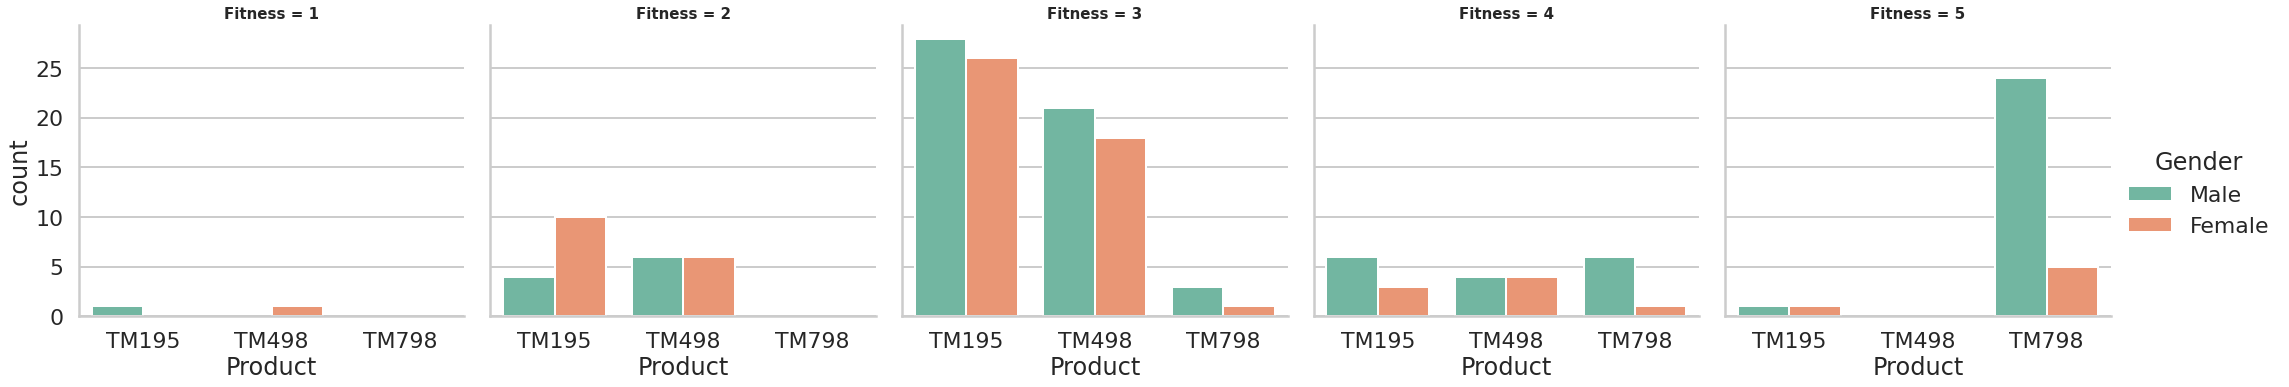

In [24]:
# Show series of countplots with varying FITNESS and for each FITNESS level show the GENDER and PRODUCT
# based distribution
ax = sns.catplot(data=cardio, x='Product', kind='count', col='Fitness', 
                 hue='Gender', palette='Set2', height=6)
ax.set_titles(size=15, fontweight='heavy');

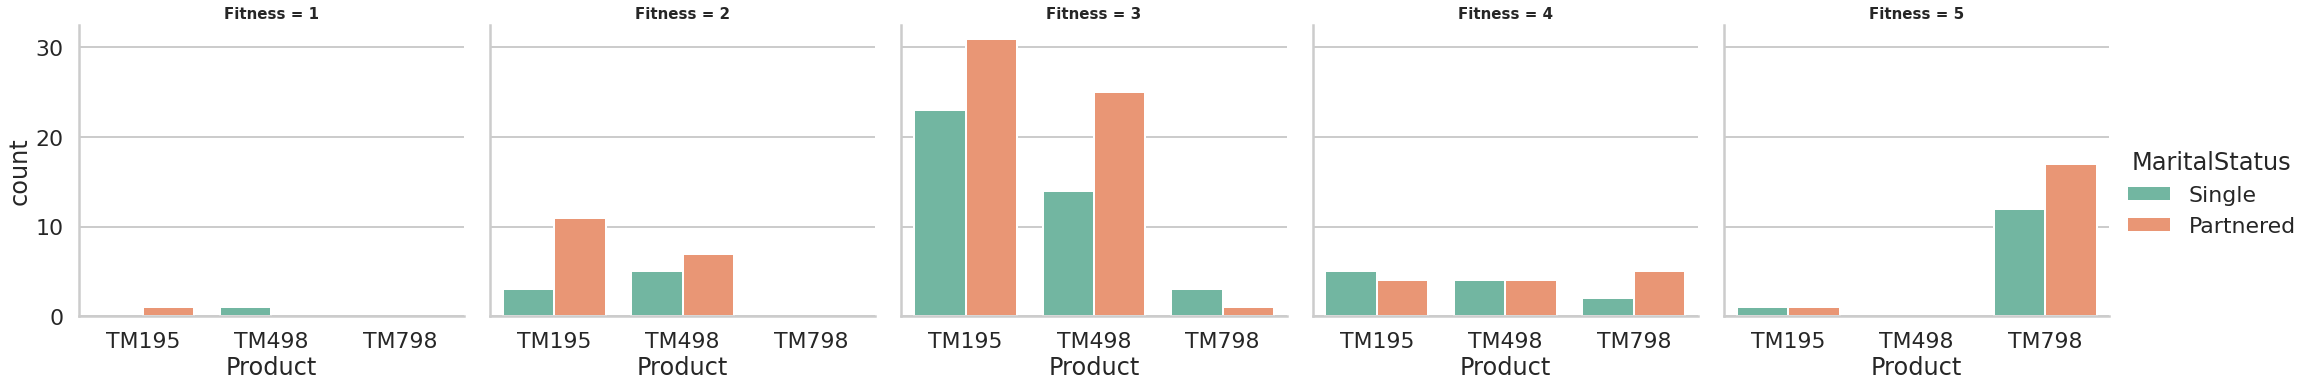

In [25]:
# Show series of countplots with varying FITNESS and for each FITNESS level show the GENDER and MARITALSTATUS
# based distribution
ax = sns.catplot(data=cardio, x='Product', kind='count', col='Fitness', 
                 hue='MaritalStatus', palette='Set2', height=6)
ax.set_titles(size=15, fontweight='heavy');

> **Observations**

> Following observations can be drawn from the `Fitness` based analysis of `Product`s:
> - Customers with `Fitness` level 3 buy TM498. This group of customers is dominated by males and are partenered.
> - Customers with `Fitness` level 5 buy TM798. This group of customers is dominated by males and are partenered.

# Summary #

## Overall ##

- We were provided with a dataset of 180 treadmill sales along with customer information some of which was in <ins>numerical</ins> form and some in <ins>categorical</ins> form
- Overall for each sale there were **9 different variables** provided, out of which **3 were categorical**
- The dataset was complete with **no missing values**
- Some information which was gathered from overall univariate and multivariate analysis of the data
    - There are 3 different treadmill models which are being sold: **TM195**, **TM498** and **TM798**
    - The customers pool contains both male (104) and female (76), as well as single (73) and married (107) 
    - The `Age` of customers is between 18 and 50 years with median  being \~26 years and the mean as \~29 years
    - The `Income` of customers is between between \~30000 to \~100,000 with median being \~50,000 and the mean as \~54,000
    - The `Education` of customers is between 12 and 21 years with median  being \~16 years and the mean as \~15.5 years
    - The `Usage` by customers is between 2 to 7 times weekly with median being 3 and the mean as \~3.5
    - The `Miles` ran by customers is between 21 to 360 annualy with median being 94 and the mean as \~103.2 miles
    - The `Fitness` of customers is self-evaluated on a scale of 1 to 5 with median being 3 and the mean as \~3.3
    - There is a strong positive correlation between `Usage`, `Miles` \& `Fitness` across all the `Product`s
    - There is a strong positive correlation of `Income` with `Education` \& `Age`, indicating higher the `Education` or older a customer is the chances are high that they make more money
    
## Customer Profiles ##

In this section customer profile for each treadmill will be summarized

### 1. TM195 ###
- Total 80 customers bought this model. This is top most sold model of the treadmill
- This model is equally popular among both male and female customers
- Approximately two third's customers of this model are partnered
- The average self rated `Fitness` of customers is 3 and close to overall `Fitness` (3.3), indicating these customers are intermediate in their physical activity
- The customers of this model belong in a `Income` group of 30k - 70k 
- There is no significant difference in `Age` group of this product compared to other products.
- The average number of years of `Education` is close to 15 years, which indicated they have a Bachelor's degree.
- The customer of this model use it about 3 times per week and run about 90 `Miles` annualy, so the treadmill does not get used for more than half of the year
- In the single cusotmers category men are dominant and in the partnered customers women are dominant


### 2. TM498 ###
- Total 60 customers bought this model. This is the second most sold model of the treamill
- This model is slightly more popular amongst male customers
- Approximately two third's customers of this model are partnered
- The average self rated `Fitness` of customers is 3 and close to overall `Fitness` (3.3), indicating these customers are intermediate in their physical activity
- The customers of this model alos belong in a `Income` group of 30k - 70k 
- There is no significant difference in age group of this product compared to other products
- The average number of years of `Education` is close to 15 years, which indicated they have a Bachelor's degree.
- The customer of this model alos use it about 3 times per week and run about 90 `Miles` annualy, so the treadmill does not get used for more than half of the year
- In the single cusotmers category women are dominant and in the partnered customers men are dominant

### 3. TM798 ###
- Total 40 customers bought this model. This is the third most sold model of the treadmill
- This model is extremely popular among male customers
- Approximately two third's customers of this model are partnered
- The average self rated `Fitness` of customers is 4.6 and is very high compared to overall `Fitness` (3.3), indicating these customers are advanced in their physical activity
- The customers of this model belong in a much higher `Income` group of 50k - 100k
- There is no significant difference in age group of this product compared to other products
- The average number of years of `Education` is close to 17 years, which indicated they have an advanced degree (Master's)
- The customer of this model use it about 5 times per week and run about 160 `Miles` annualy, so the treadmill does get used more compared to other models
- In both single and partnered customer category men are dominant


## Recommendations ##
- TM195 and TM498 customer profile is nearly similar and it is a good target product for beginner to intermediate users. TM798 on the other hand is heavily preferred by users with high fitness levels
    - TM195 and TM498 should be advertised as an entry/intermediate level fitness equipment. Especially in locations which have snowy winters and also among elder population
    - TM798 should be advertised as an advanced level fitness equipment
- TM195 and TM498 do not get used as often as TM798, which means less wear and tear, hence
    - TM198 and TM498 can be sold with optional/additonal cost maintainance support 
    - TM798 can be sold at a higher price with a maintainance support built into that price
- Advanced female users is an untapped market as shown in the demographics of TM798 (smaller representation)
    - Women centered promotion of TM798 should be priortized
    - TM195 and TM498 sales can alos benefit from women centered product promotion